# K Means Clustering using the Customers Dataset

In [5]:
# Importing required modules for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [6]:
# Reading the csv file as a pandas dataframe
customers = pd.read_csv('customers/input/customers.csv')

In [7]:
print(customers.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
# EDA
## Data size
print(customers.shape)

(200, 5)


In [9]:
## Decribe data
print(customers.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [10]:
# Data cleaning
## Null values
print(customers.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
## Duplicates
print(customers.duplicated().sum())

0


In [12]:
## Data types
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [13]:
# Data correlation
corr = customers.corr()
print(corr)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


C:\Users\Clarus\AppData\Local\Temp\ipykernel_8752\3168616376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customers.corr()


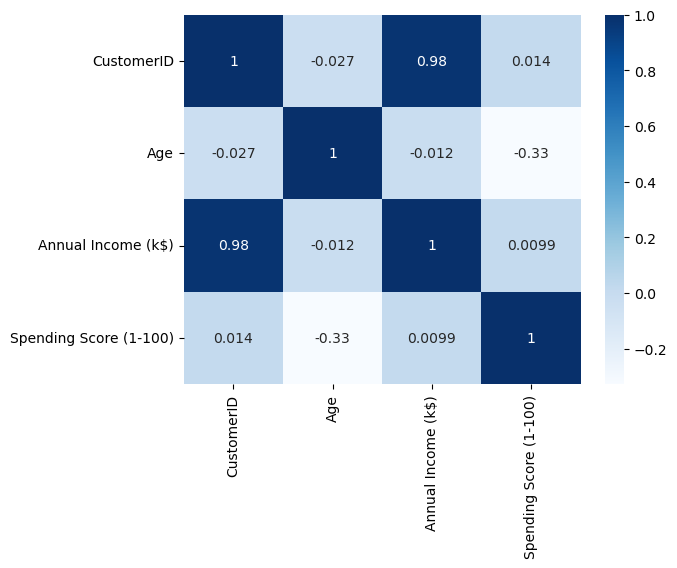

In [14]:
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

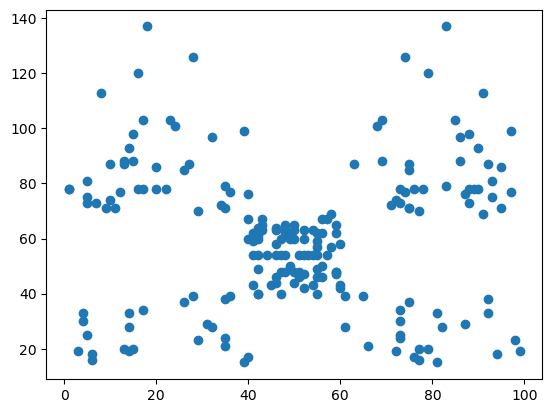

In [15]:
# Plotting a scatter plot of Spending score against Annual Income
plt.scatter(customers['Spending Score (1-100)'], customers['Annual Income (k$)'])
plt.show()

In [16]:
# Creating a 2D array of Spending Score and Annual Income columns which will be used for the clustering
df = np.array(customers[['Spending Score (1-100)', 'Annual Income (k$)']])

c:\Users\Clarus\anaconda3\envs\ai_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Clarus\anaconda3\envs\ai_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Clarus\anaconda3\envs\ai_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Clarus\anaconda3\envs\ai_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

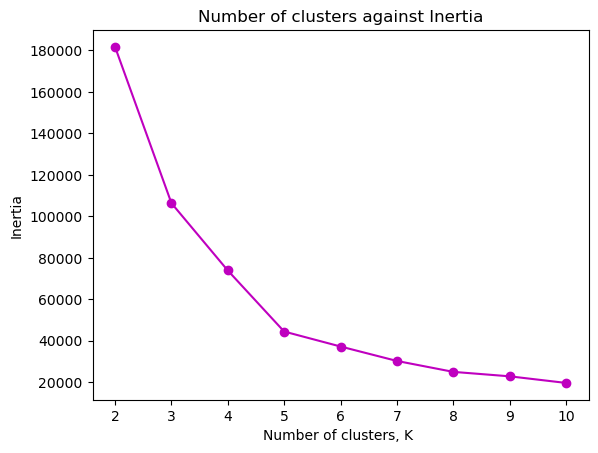

In [17]:
inertia = []
k_values = range(2,11)

for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

plt.plot(k_values, inertia, 'o-m')
plt.title("Number of clusters against Inertia")
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")
plt.show()

In [18]:
# Using the optimal K value found from elbow method to perform the K Means Clustering
model = KMeans(init='k-means++', n_clusters=5)
model.fit(df)

c:\Users\Clarus\anaconda3\envs\ai_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
# Adding the Cluster information to the original dataframe 
predict = model.predict(df)
df_cluster = np.append(df, predict.reshape(-1,1), axis=1)

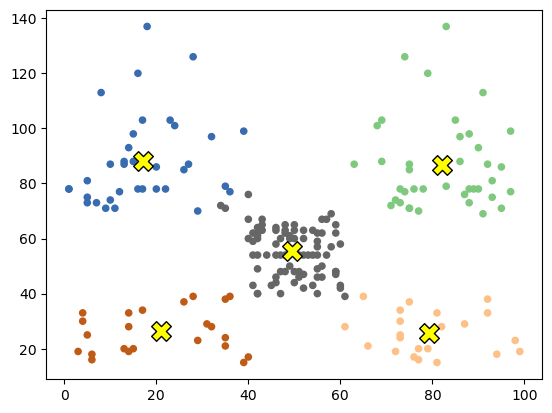

In [20]:
# Plotting a scatter plot of Spending Score against Annual income with centroid information included
centroids = model.cluster_centers_
plt.scatter(df_cluster[:, 0], df_cluster[:, 1], s=20, c=df_cluster[:, 2], cmap='Accent')
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, facecolor='yellow', edgecolor='black')
plt.show()